In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.signal import butter
from scipy.signal import filtfilt
import matplotlib.pyplot as plt

In [3]:
from utils import *

In [5]:
# 06/02/23 data
filepath = '/Users/james/Documents/Research/oklahoma-wind-turbine/data/das/recording_2023-06-02T11_04_43-0500/'
decim_to_100(filepath,'sensor_2023-06-02T110442-0500')

### First decimate the files down to 100 Hz

In [7]:
directory = '/Users/james/Documents/Research/oklahoma-wind-turbine/data/das/recording_2023-06-02T11_04_43-0500/sensor_2023-06-02T110442-0500_decimated100hz'
strain_data = load_decim_data(directory)

In [12]:
print(np.shape(strain_data))

(102, 60000)


In [ ]:
# Each channel is approximately 8 CSUs, 1 CSU is approximately 1.027 meters
# We have 102 channel readouts

### Try to figure out which channels correspond with what!
#### Indexes: 
Estimate, from shed to beginning of first longitudinal cable: 10 meters ~ 1.5 channels<br />

### Look at the channels with highest strain first (Probably at the bottom of the tower)
#### Indexes:


In [105]:
from utils import filter_plot_single

In [106]:
phase_1 = filter_plot_single(strain_data_P1)
phase_2 = filter_plot_single(strain_data_P2)
phase_3 = filter_plot_single(strain_data_P3)
phase_4 = filter_plot_single(strain_data_P4)

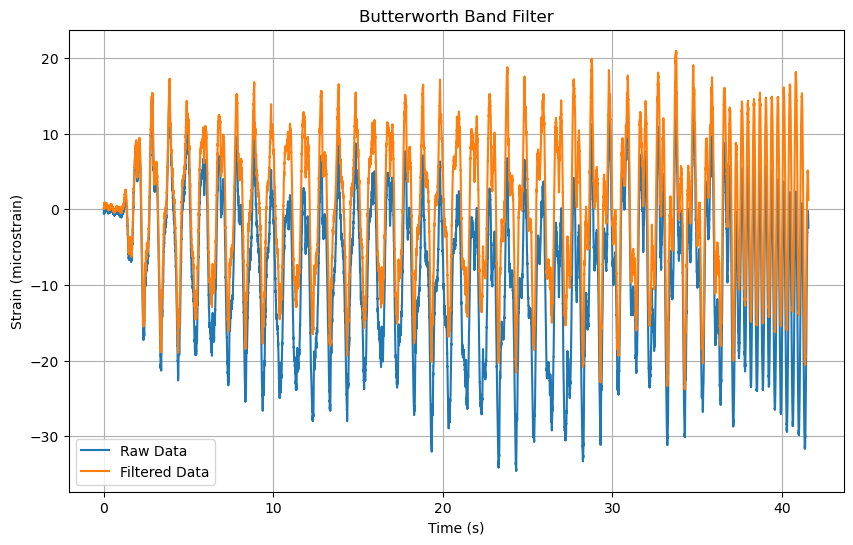

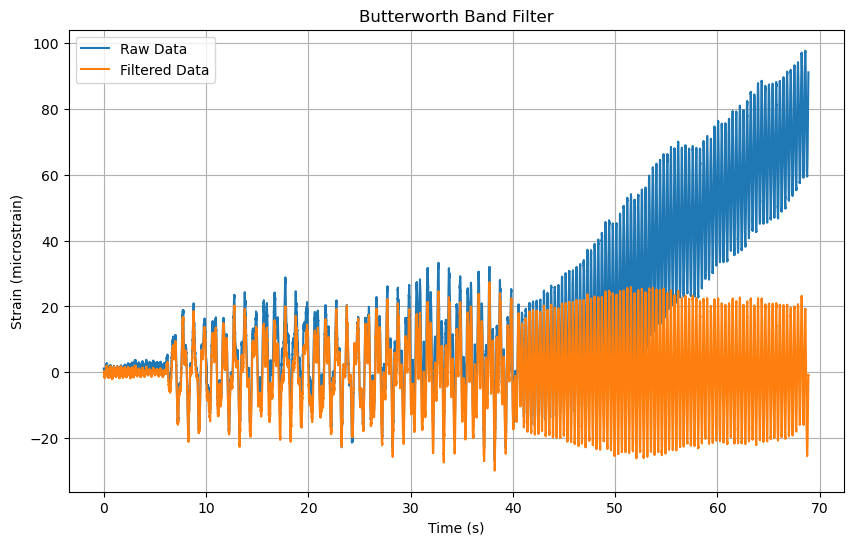

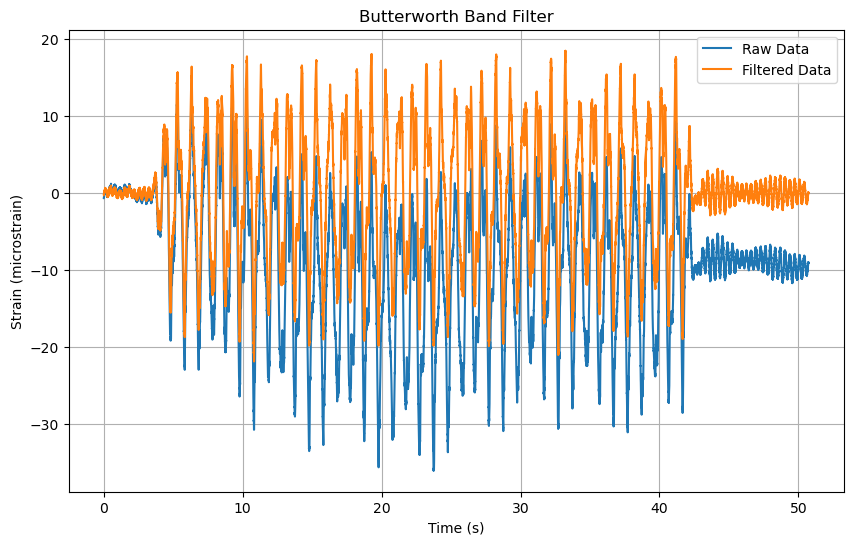

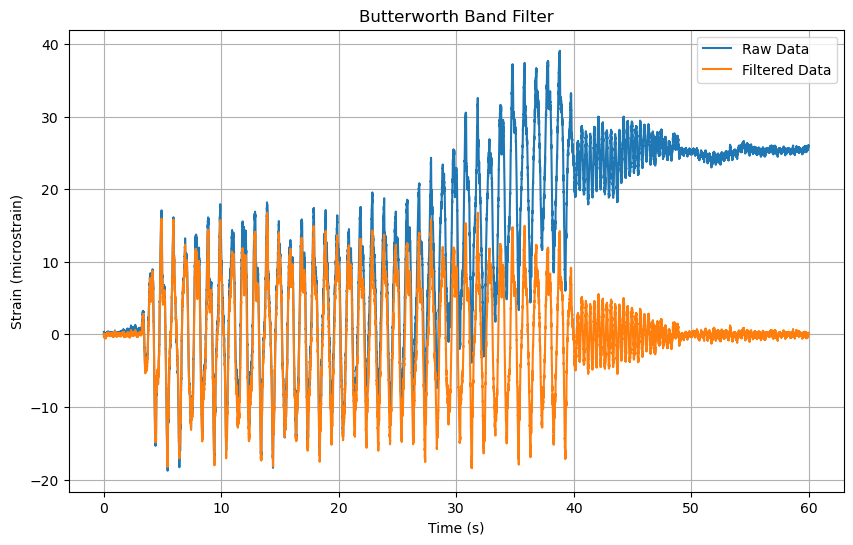

In [111]:
channel = 14
phase_1.butterworth(channel,order=2,cutoff_freq= 0.05)
phase_1.plot_side_by_side()
phase_2.butterworth(channel,order=2,cutoff_freq= 0.05)
phase_2.plot_side_by_side()
phase_3.butterworth(channel,order=2,cutoff_freq= 0.05)
phase_3.plot_side_by_side()
phase_4.butterworth(channel,order=2,cutoff_freq= 0.05)
phase_4.plot_side_by_side()

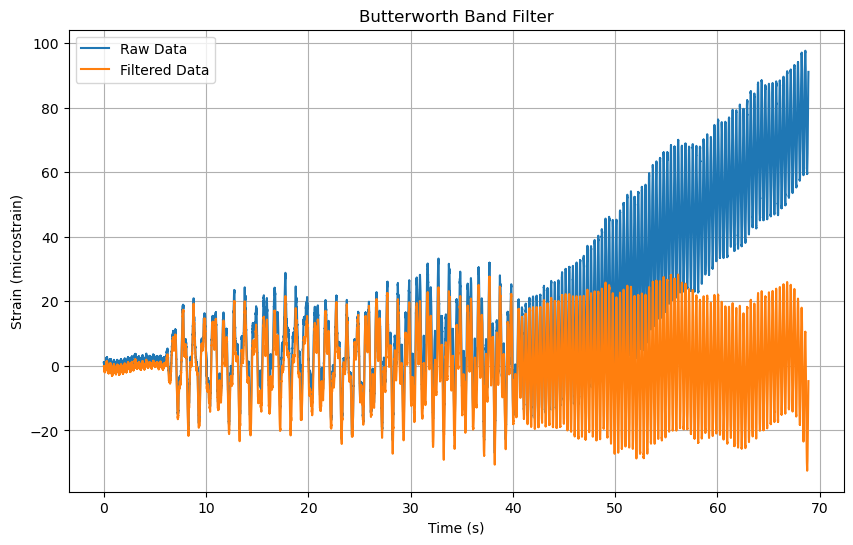

In [112]:
phase_1.psd_freqs()
phase_2.psd_freqs()
phase_3.psd_freqs()
phase_4.psd_freqs()

(array([2.76650009e+03, 2.79327032e+03, 2.89250269e+03, ...,
        3.11661313e-03, 1.33825511e-03, 5.49758056e-04]),
 array([0.00000000e+00, 1.66730580e-02, 3.33461160e-02, ...,
        4.99958317e+02, 4.99974990e+02, 4.99991663e+02]))

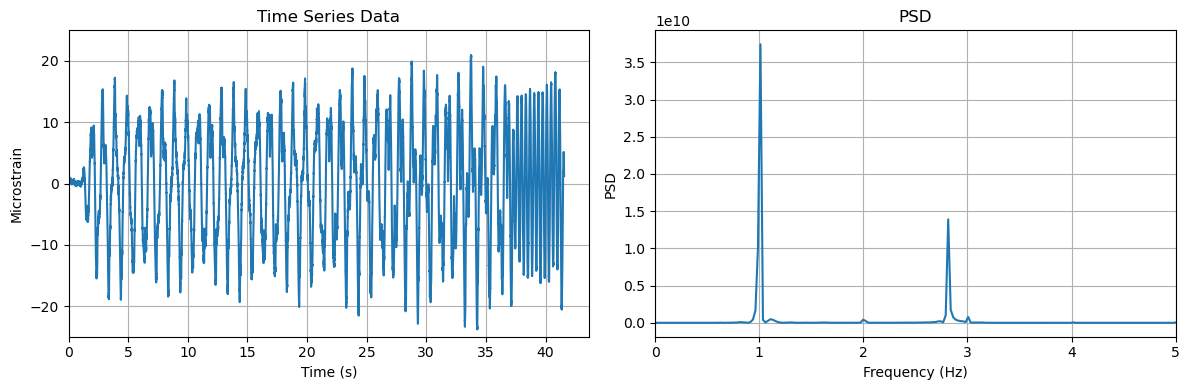

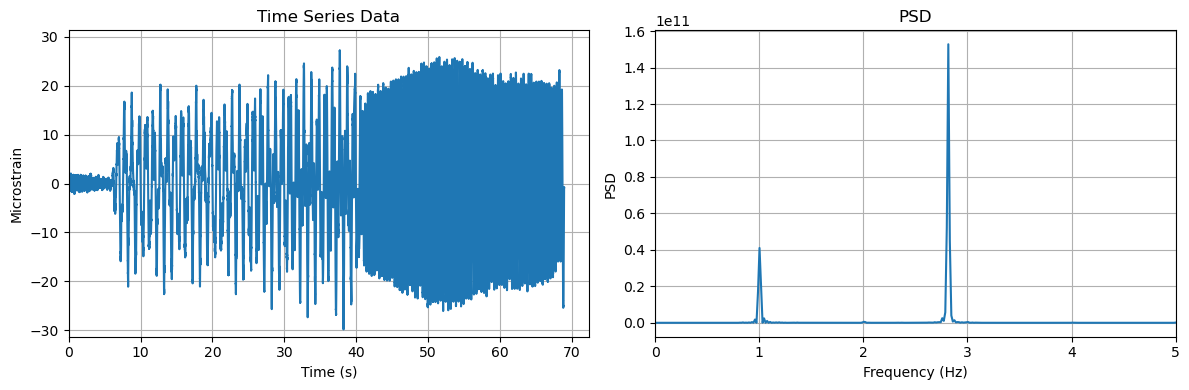

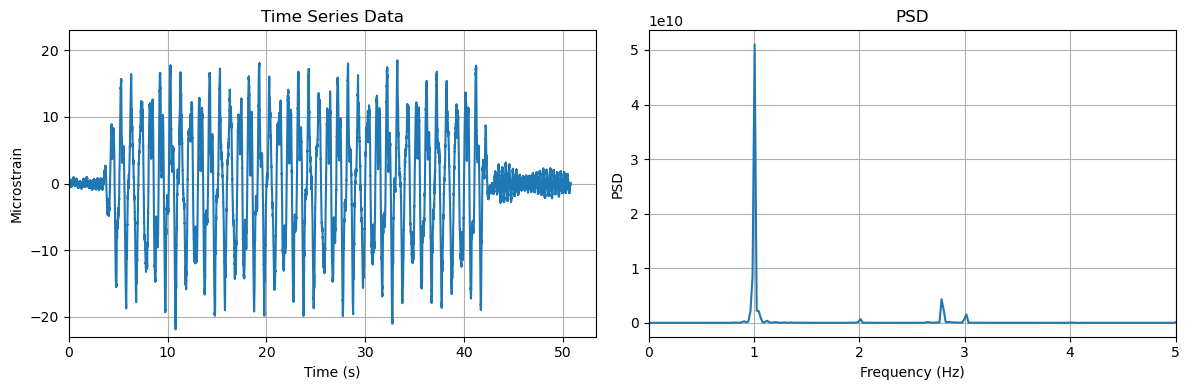

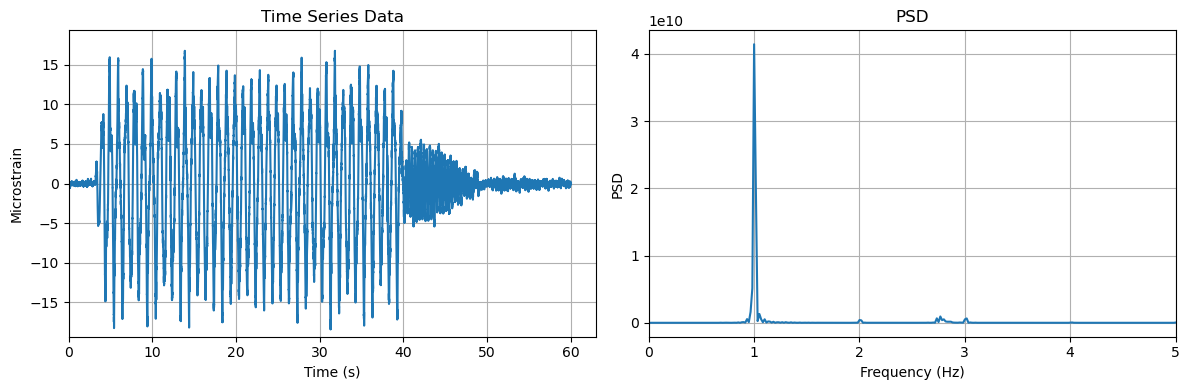

In [113]:
phase_1.plot_psd_filtered(5)
phase_2.plot_psd_filtered(5)
phase_3.plot_psd_filtered(5)
phase_4.plot_psd_filtered(5)

In [167]:
# Listing the relevant channels
# channels = [12,13,14,15,16,17,19,20,21,22,26,27] 
channels = [54,53,52,51,50,49,48,46,45,44,43,39,38,37]
# channels = [12,13,14,15,16,17,19,20,21,22,26,27,54,53,52,51,50,49,48,46,45,44,43,39,38,37,59,60,61,62,63,64,66,67,68,69,74,75,76,104,103,102,101,100,99,97,96,95,94,90,89]

In [168]:
phase_1.butter_all(channels=channels,cutoff_freq=0.05)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

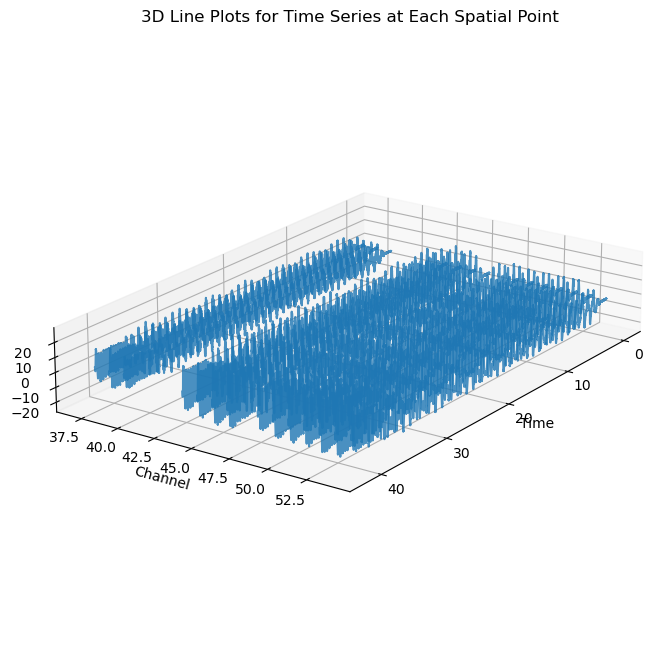

In [169]:
phase_1.iso_view_plot(channels=channels)

### Comparing different phases all at once!

In [170]:
from utils import filter_plot_comparison

In [171]:
testing = filter_plot_comparison(strain_data_P1,strain_data_P2,strain_data_P3,strain_data_P4)

In [172]:
testing.butterworth(channels=channels,cutoff_freq=0.05);

In [174]:
print(channels)

[54, 53, 52, 51, 50, 49, 48, 46, 45, 44, 43, 39, 38, 37]


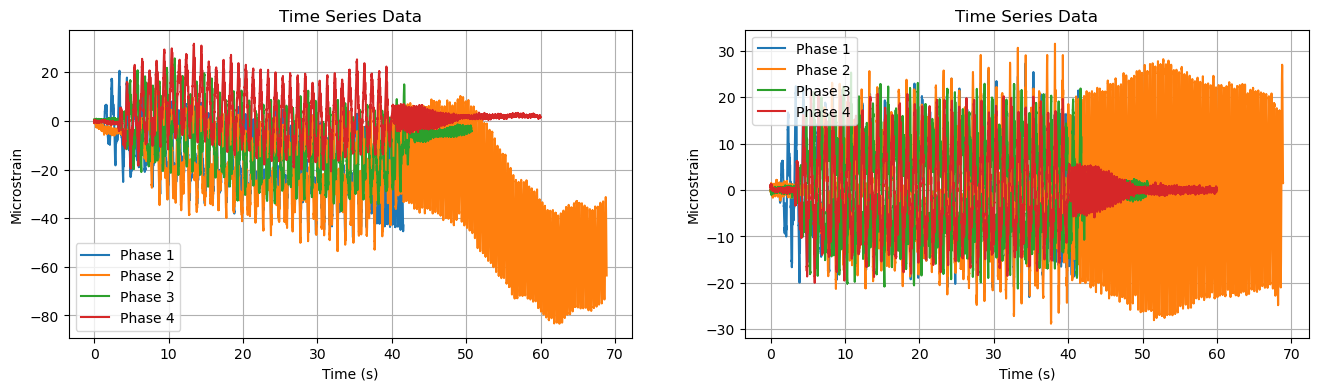

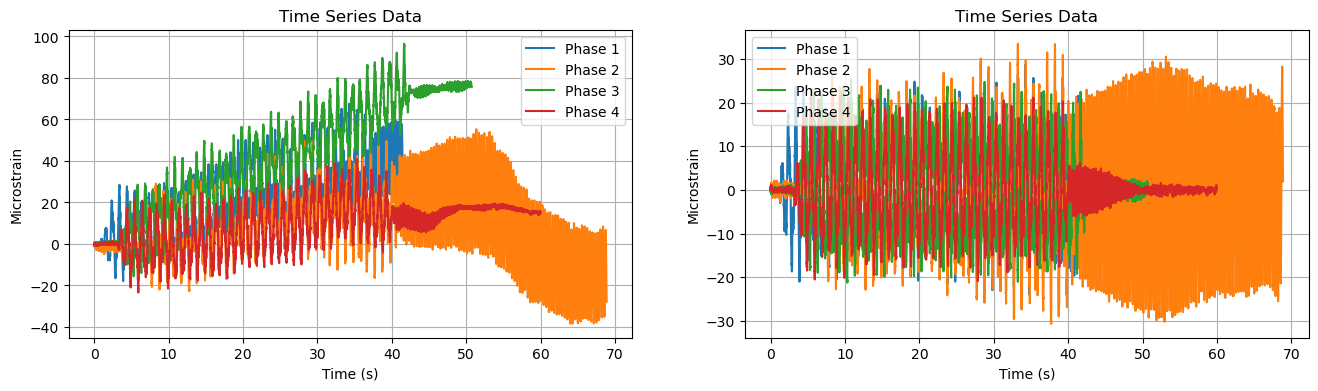

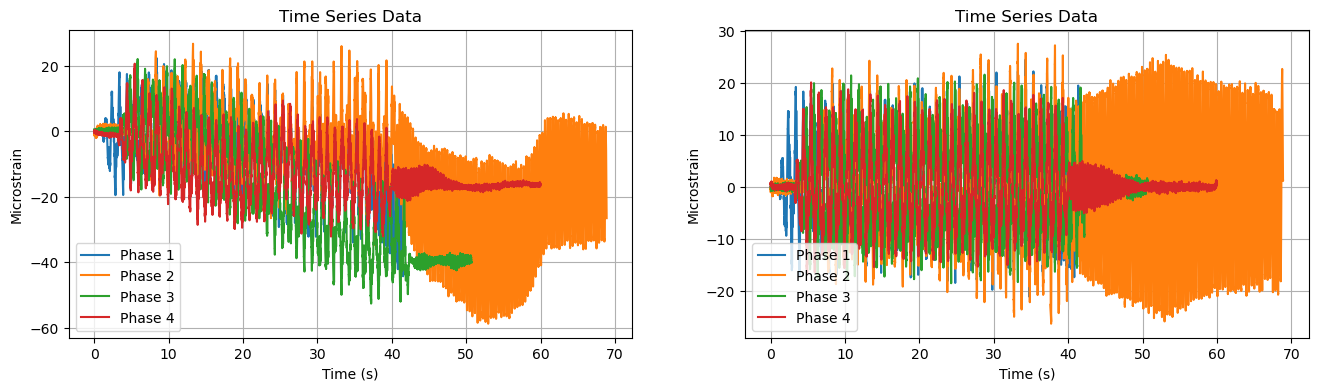

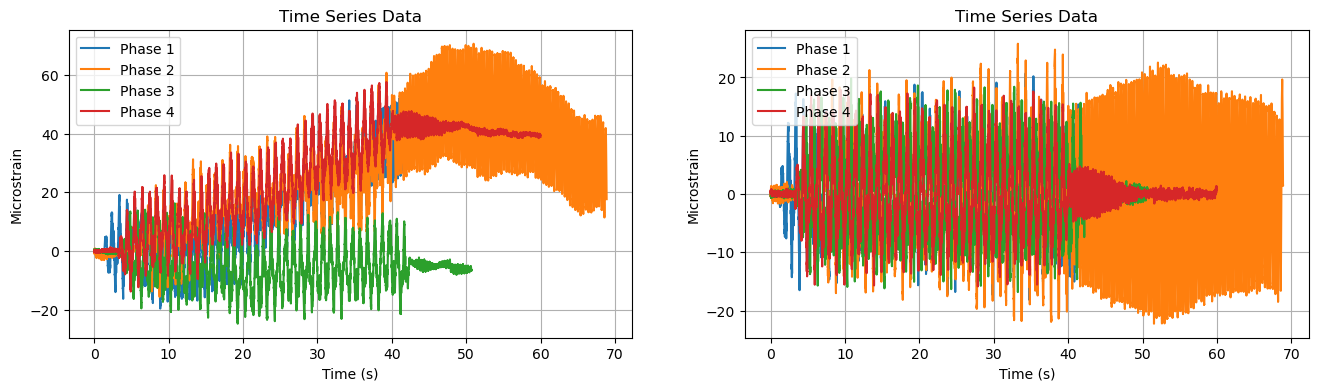

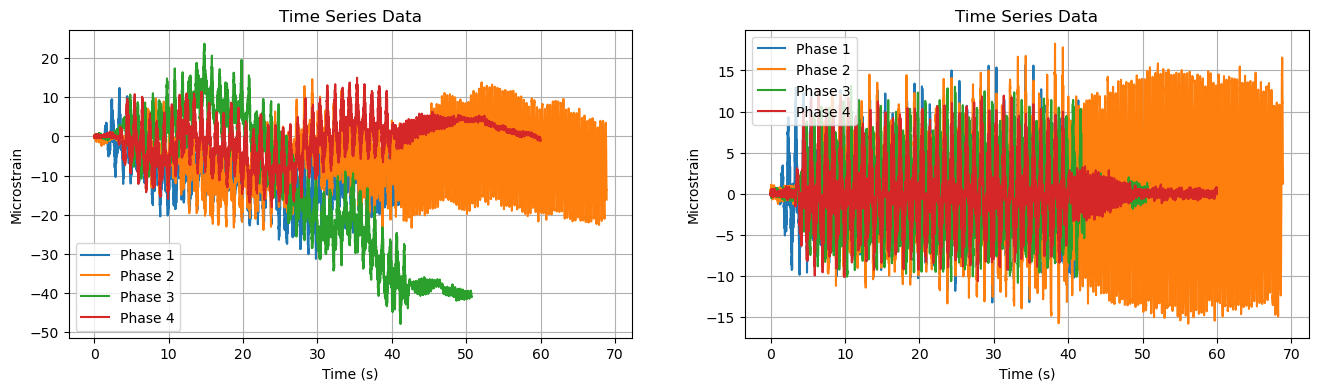

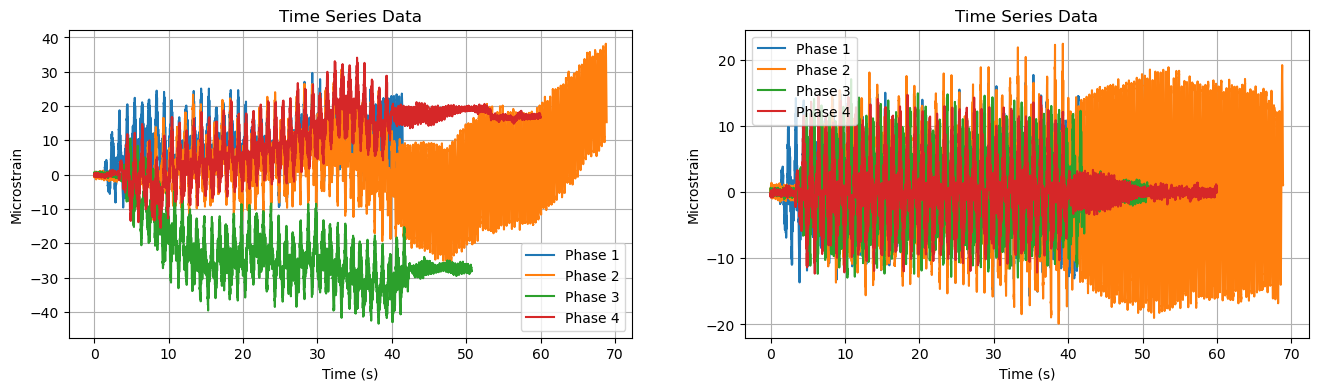

In [176]:
testing.plotting_all_phases(channel=46)
testing.plotting_all_phases(channel=45)
testing.plotting_all_phases(channel=44)
testing.plotting_all_phases(channel=43)
testing.plotting_all_phases(channel=39)
testing.plotting_all_phases(channel=38)